## Problem Statement

Indian Premier League (IPL) is a league for Twenty20 (T20) cricket championships started in India. The auction price of the player depends on his performance in test matches or one-day internationals. The primary skill of the player also contributes to the auction price. We use different regression techniques to predict the auction price of the player.

## About the dataset (IPL Auction data)

**PLAYER NAME**: Name of the player<br>
**AGE**: The age of the player is classified into three categories. Category 1 means the player is less than 25 years old. Category 2 means the player is between 25 and 35 years and Category 3 means the player has aged more than 35.<br>
**COUNTRY**: Country of the player<br>
**PLAYING ROLE**: Player's primary skill<br>
**T-RUNS**: Total runs scored in the test matches<br>
**T-WKTS**: Total wickets taken in the test matches<br>
**ODI-RUNS-S**: Runs scored in One Day Internationals<br>
**ODI-SR-B**: Batting strike rate in One Day Internationals<br>
**ODI-WKTS**: Wickets taken in One Day Internationals<br>
**ODI-SR-BL**: Bowling strike rate in One Day Internationals<br>
**CAPTAINCY EXP**: Captained a team or not<br>
**RUNS-S**: Number of runs scored by a player<br>
**HS**: Highest score by a batsman in IPL<br>
**AVE**: Average runs scored by a batsman in IPL<br>
**SR-B**: Batting strike rate (ratio of the number of runs scored to the number of basses faced) in IPL.<br>
**SIXERS**: Number of six runs scored by a player in IPL.<br>
**RUNS-C**: Number of runs conceded by a player<br>
**WKTS**: Number of wickets were taken by a player in IPL.<br>
**AVE-BL**: Bowling average (number of runs conceded / number of wickets taken) in IPL.<br>
**ECON**: Economy rate of a bowler in IPL (number of runs conceded by the bowler per over).<br>
**SR-BL**: Bowling strike rate (ratio of the number of balls bowled to the number of wickets taken) in IPL.<br>
**SOLD PRICE**: Auction price of the player<br>

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')


# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
#from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
#from sklearn.linear_model import SGDRegressor



In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [3]:
# load the csv file
# store the data in 'df_ipl'
df_ipl = pd.read_csv('ipl_player_auction.csv')

# display first five observations using head()
df_ipl.head()

,PLAYER NAME,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,...,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,SOLD PRICE
0,Abdulla,2,South Africa,Allrounder,0,0,0,0.000000,0,0.000000,...,0,0.000000,0.000000,0,307,15,20.470000,9.900000,13.930000,50000
1,Abdur Razzak,2,Bangladesh,Bowler,266,18,657,71.410000,185,37.600000,...,0,0.000000,0.000000,0,29,0,0.000000,17.500000,0.000000,50000
2,Agarkar,2,India,Bowler,669,58,1269,80.620000,288,32.900000,...,39,18.560000,121.010000,5,1059,29,36.520000,8.810000,24.900000,350000
3,Ashwin,1,India,Bowler,308,31,241,84.560000,51,36.800000,...,11,5.800000,76.320000,0,1125,49,22.960000,8.230000,22.140000,850000
4,Badrinath,2,India,Batsman,109,0,79,45.930000,0,0.000000,...,71,32.930000,120.710000,28,0,0,0.000000,1.000000,0.000000,800000


**Let us now see the number of variables and observations in the data.**

In [4]:
# use 'shape' to check the dimension of data
df_ipl.shape

(130, 22)

**Interpretation:** The data has 130 observations and 22 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [5]:
# use 'dtypes' to check the data type of a variable
df_ipl.dtypes

PLAYER NAME       object
AGE                int64
COUNTRY           object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP      int64
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
SOLD PRICE         int64
dtype: object

**Interpretation:** The variables `PLAYER NAME`, `COUNTRY` and `PLAYING ROLE` are categorical. All the remaining variables are numerical. 

From the above output, we see that the data type of `AGE` and `CAPTAINCY EXP` are 'int64'.

But according to the data definition, `AGE` and `CAPTAINCY EXP` are categorical variables, which are wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

#### Change the data type as per the data definition.

In [6]:
# convert numerical variables to categorical (object) 
# use astype() to change the data type

# change the data type of 'AGE' 
df_ipl['AGE'] = df_ipl['AGE'].astype('object')

# change the data type of 'CAPTAINCY EXP'
df_ipl['CAPTAINCY EXP'] = df_ipl['CAPTAINCY EXP'].astype('object')

#### Recheck the data type after the conversion. 

In [7]:
# recheck the data types using 'dtypes'
df_ipl.dtypes

PLAYER NAME       object
AGE               object
COUNTRY           object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP     object
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
SOLD PRICE         int64
dtype: object

**Interpretation:** Now, all the variables have the correct data type.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

The column `PLAYER NAME` contains the name of the player, which is redundant for further analysis. Thus, we drop the column.

In [8]:
# drop the column 'PLAYER NAME' using drop()
# 'axis = 1' drops the specified column
df_ipl = df_ipl.drop('PLAYER NAME', axis = 1)

<a id="null"></a>
## 2.4 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [9]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_ipl.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_ipl.isnull().sum()*100/df_ipl.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
AGE,0,0.000000
HS,0,0.000000
SR-BL,0,0.000000
ECON,0,0.000000
AVE-BL,0,0.000000
WKTS,0,0.000000
RUNS-C,0,0.000000
SIXERS,0,0.000000
SR-B,0,0.000000
AVE,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="dummy"></a>
## 2.5 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [10]:
# store the target variable 'SOLD PRICE' in a dataframe 'df_target'
df_target = df_ipl['SOLD PRICE']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'SOLD PRICE' using drop()
# 'axis = 1' drops the specified column
df_feature = df_ipl.drop('SOLD PRICE', axis = 1)

#### Filter numerical and categorical variables.

In [11]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL'],
      dtype='object')

In [12]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include=[np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include=object)

# display categorical features
df_cat.columns

Index(['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP'], dtype='object')

The regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [13]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables for 'medincome'
dummy_var = pd.get_dummies(data = df_cat, drop_first=True)

In [14]:
# SCALE the NUMERIC variables 
# initialize the standard scalar
X_scaler = StandardScaler()

# standardize all the columns of the dataframe 'df_ipl_dummy'
df_scaled_num = X_scaler.fit_transform(df_num)
df_scaled_num = pd.DataFrame(df_scaled_num, columns=df_num.columns)
df_scaled_num.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
0,-0.674581,-0.468108,-0.703043,-2.757731,-0.686760,-1.277132,-0.839014,-1.307954,-1.693829,-3.102818,-0.745369,-0.303010,-0.096956,-0.123459,0.423147,-0.226928
1,-0.593774,-0.341460,-0.518927,0.008708,0.983269,0.133821,-0.839014,-1.307954,-1.693829,-3.102818,-0.745369,-0.802864,-0.786968,-1.111749,1.877704,-1.142498
2,-0.471347,-0.060022,-0.347421,0.365505,1.913068,-0.042548,-0.566677,-0.232487,-0.014415,0.278728,-0.534721,1.049112,0.547056,0.651433,0.214533,0.494091
3,-0.581015,-0.249993,-0.635505,0.518141,-0.226374,0.103801,-0.744430,-1.004617,-1.169012,-0.970105,-0.745369,1.167783,1.467072,-0.003242,0.103527,0.312686
4,-0.641468,-0.468108,-0.680904,-0.978393,-0.686760,-1.277132,1.308699,0.649946,1.285864,0.270344,0.434258,-0.855007,-0.786968,-1.111749,-1.280217,-1.142498


#### Concatenate numerical and dummy encoded categorical variables.

In [15]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_scaled_num, dummy_var], axis=1)

# display first five observations
X.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_New Zealand,COUNTRY_Pakistan,COUNTRY_South Africa,COUNTRY_Sri Lanka,COUNTRY_West Indies,COUNTRY_Zimbabwe,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,-0.674581,-0.468108,-0.703043,-2.757731,-0.686760,-1.277132,-0.839014,-1.307954,-1.693829,-3.102818,...,0,0,1,0,0,0,0,0,0,0
1,-0.593774,-0.341460,-0.518927,0.008708,0.983269,0.133821,-0.839014,-1.307954,-1.693829,-3.102818,...,0,0,0,0,0,0,0,1,0,0
2,-0.471347,-0.060022,-0.347421,0.365505,1.913068,-0.042548,-0.566677,-0.232487,-0.014415,0.278728,...,0,0,0,0,0,0,0,1,0,0
3,-0.581015,-0.249993,-0.635505,0.518141,-0.226374,0.103801,-0.744430,-1.004617,-1.169012,-0.970105,...,0,0,0,0,0,0,0,1,0,0
4,-0.641468,-0.468108,-0.680904,-0.978393,-0.686760,-1.277132,1.308699,0.649946,1.285864,0.270344,...,0,0,0,0,0,0,1,0,0,0


**Interpretation:** We can see that the dummy variables are added to the data. '1' in the column 'AGE_2' represents that the age of the corresponding player is between 25 to 35 years. Also, the '0' in both the columns 'AGE_2' and 'AGE_3' indicates that the age of the corresponding player is less than 25.

<a id="scale"></a>
## 2.6 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [16]:
# Scaling already performed

y = df_target

In [17]:
X.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_New Zealand,COUNTRY_Pakistan,COUNTRY_South Africa,COUNTRY_Sri Lanka,COUNTRY_West Indies,COUNTRY_Zimbabwe,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,-0.674581,-0.468108,-0.703043,-2.757731,-0.686760,-1.277132,-0.839014,-1.307954,-1.693829,-3.102818,...,0,0,1,0,0,0,0,0,0,0
1,-0.593774,-0.341460,-0.518927,0.008708,0.983269,0.133821,-0.839014,-1.307954,-1.693829,-3.102818,...,0,0,0,0,0,0,0,1,0,0
2,-0.471347,-0.060022,-0.347421,0.365505,1.913068,-0.042548,-0.566677,-0.232487,-0.014415,0.278728,...,0,0,0,0,0,0,0,1,0,0
3,-0.581015,-0.249993,-0.635505,0.518141,-0.226374,0.103801,-0.744430,-1.004617,-1.169012,-0.970105,...,0,0,0,0,0,0,0,1,0,0
4,-0.641468,-0.468108,-0.680904,-0.978393,-0.686760,-1.277132,1.308699,0.649946,1.285864,0.270344,...,0,0,0,0,0,0,1,0,0,0


<a id="split"></a>
## 2.7 Train-Test Split

Before applying variour regression techniques to predict the auction price of the player, let us split the dataset in train and test set.

In [18]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (104, 31)
y_train (104,)
X_test (26, 31)
y_test (26,)


In [19]:
X = X_train.copy()
Y = y_train.copy()

<a id="GD"></a>
# 4. Gradient Descent

## Step 1: Random Initialization of the Bias (intercept) and Weights (feature weight)

* bias is b0 and weights is b1

In [20]:
import random

# dim: number of features in the dataset
def initialize_bw(dim):

    # set the seed to 42
    np.random.seed(seed = 42)
    random.seed(42)
    
    # initialize the bias
    b = random.random()
    
    # initialize the weights
    w = np.random.rand(dim)
    
    return b, w

In [21]:
# assign random values to the bias and weights
b, w = initialize_bw(X.shape[1])
# print the bias
print('Bias: ', b)
# print the weights
print('Weights: ', w)

Bias:  0.6394267984578837
Weights:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485]


## Step 2: Predict Y values using the Bias and Weights

In [22]:
# b: bias
# w: weights
# X: input dataframe
# np.matmul(): used for matrix multiplication of weights with the input variable values

def predict_y(b, w, X):
    return b + np.matmul(X, w)

In [23]:
# Predict Y values using the Bias and Weights
y_pred = predict_y(b, w, X)

# show first 10 values of y_pred
y_pred[:10]

19     3.298091
14     1.109111
91     3.661293
35     2.048086
20    -1.784024
110    2.032574
118    0.307567
3      1.325294
79     6.129780
115    1.959105
dtype: float64

## Step 3: Calculate the cost using the cost function

In [24]:
# Y: actual target values
# y_pred: predicted values
def get_cost(Y, y_pred):
    return mean_squared_error(Y, y_pred)

In [25]:
get_cost(Y, y_pred)

453087587018.69995

## Step 4: Update the Bias And the Weights

In [26]:
# X: input dataframe
# Y: actual output 
# y_pred: predicted output
# b_prev: value of bias before updation
# w_prev: value of weights before updation
# learning_rate (or 'alpha'): learning parameter that decides the magnitude of the update to be done to the bias annd weights
def update_bw(X, Y, y_pred, b_prev, w_prev, learning_rate):
    # gradient of bias
    db = (np.sum(y_pred - Y) * 2) / len(Y)
    
    # gradient of weight
    dw = (np.dot((y_pred - Y), X) * 2) / len(Y)
    
    # update the bias
    b_new = b_prev - learning_rate * db
    
    # update the weights
    w_new = w_prev - learning_rate * dw
    
    return (b_new, w_new)

In [27]:
# print the values of bias and weights obtained after initialization
print('After initialization:-  b: ',b, '\nWeights: ', w)

# print the values of bias and weights obtained after updating the bias and weights
b, w = update_bw(X, Y, y_pred, b, w, 0.01)
print('\nAfter Update:-  b: ',b, '\nWeights: ', w)

After initialization:-  b:  0.6394267984578837 
Weights:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485]

After Update:-  b:  10571.564173898414 
Weights:  [1.99300973e+03 2.26571170e+02 3.13712138e+03 1.70728263e+03
 5.34161392e+02 2.54210995e+02 4.60764231e+03 2.74096792e+03
 2.93010644e+03 1.45661116e+03 3.73705480e+03 9.81676656e+02
 5.26920131e+02 9.51512814e+02 5.86871512e+02 7.52585064e+02
 6.52816888e+03 2.19281906e+03 4.31945019e-01 2.98367493e+02
 5.49559515e+03 7.08790430e+02 5.24330836e+02 1.18305274e+03
 5.64873563e+02 1.11362193e+02 2.42385194e+01 4.20723099e+03
 2.84942751e+03 9.94274851e+02 4.70250638e+03]


# Write a function to find the optimal value of Bias and Weights

In [28]:
# X: input dataframe
# Y: actual output 
# learning_rate (or 'alpha'): learning parameter that decides the magnitude of the update to be done to the bias annd weights
# num_iterations: number of iterations
def GradientDescent(X, Y, alpha = 0.01, num_iterations = 100):
    # initialize the bias and weights
    b, w = initialize_bw(X.shape[1])
    
    # create a dataframe that stores the iterations and the cost
    df_iter_cost = pd.DataFrame(columns=['Iterations', 'Cost'])
    
    # iterate 
    for each_iter in range(num_iterations):
        # predict the value of y
        y_pred = predict_y(b, w, X)
        
        # calculate the cost
        cost = get_cost(Y, y_pred)
        
        # save the previous bias and weights
        b_prev = b
        w_prev = w
        
        # update the bias and weights
        b, w = update_bw(X, Y, y_pred, b_prev, w_prev, alpha)
        
        df_iter_cost.loc[each_iter] = [each_iter, cost]
        
    # print the final bias and weights
    #print("Final bias and weights:- \n", b, '\n\n', w)

    return(df_iter_cost, b, w)

In [29]:
# running gradient descent with the learning rate 0.001
df_iter_cost_1, b, w = GradientDescent(X, Y, alpha=0.001, num_iterations=200)

In [30]:
# running gradient descent with the learning rate 0.1
df_iter_cost_2, b, w = GradientDescent(X, Y, alpha=0.1, num_iterations=200)

Text(0, 0.5, 'Cost')

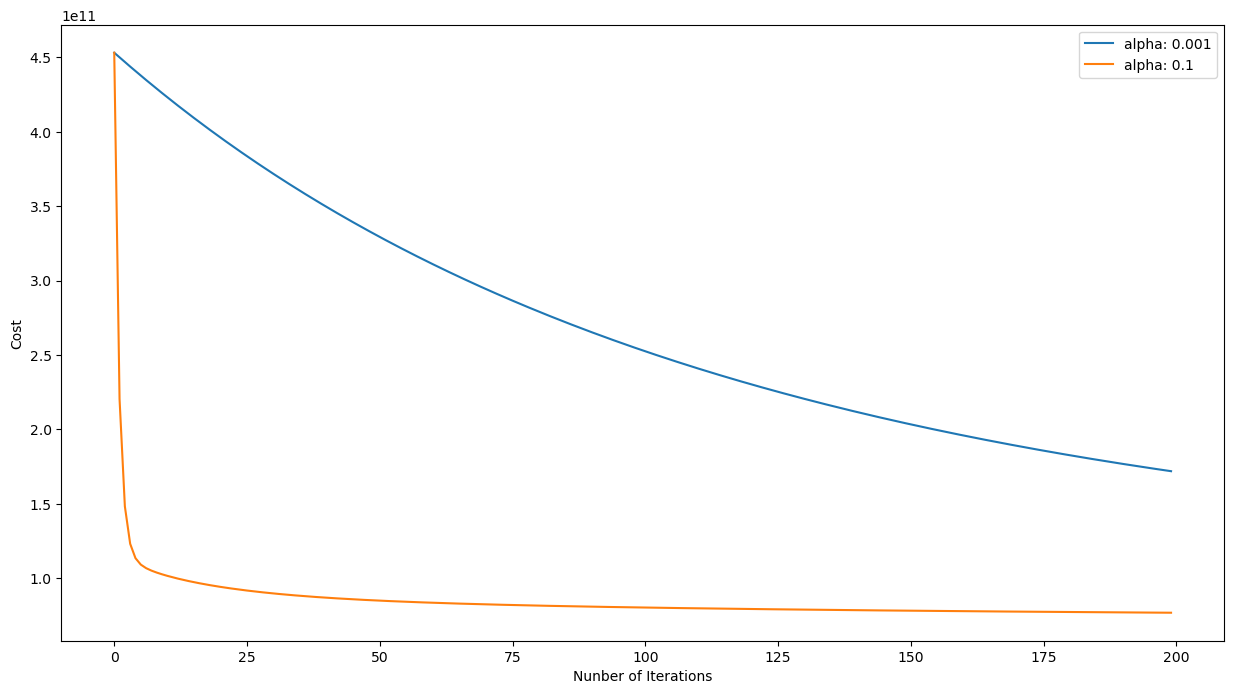

In [31]:
plt.plot(df_iter_cost_1['Iterations'], df_iter_cost_1['Cost'], label = "alpha: 0.001")
plt.plot(df_iter_cost_2['Iterations'], df_iter_cost_2['Cost'], label = "alpha: 0.1")
# place a legend on the axes
plt.legend()
# set the label for the x-axis
plt.xlabel('Nunber of Iterations')
# set the label for the y-axis
plt.ylabel('Cost')

**Interpretation:** The above plot shows that the learning is faster for alpha value is 0.01 as compared to 0.001. 
For the smaller values of the learning rate, the learning could be slower whereas higher learning rate leads to skipping the minimum of cost function. Thus, it is crucial to find the optimal value for the learning rate

In [32]:
# printing the dataset
df_iter_cost_2

,Iterations,Cost
0,0.000000,453087587018.699951
1,1.000000,220312934045.003784
2,2.000000,148227924744.179474
3,3.000000,123046928989.961243
4,4.000000,113385046711.229752
...,...,...
195,195.000000,76826485787.714615
196,196.000000,76802870099.691010
197,197.000000,76779415212.294769
198,198.000000,76756119602.208847
